<a href="https://colab.research.google.com/github/JSJeong-me/AI-Innovation-2024/blob/main/Transformer/5-4-visualize-sound(Andre).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### https://towardsdatascience.com/getting-to-know-the-mel-spectrogram-31bca3e2d9d0

### https://librosa.github.io/librosa/generated/librosa.feature.melspectrogram.html

### https://github.com/jameslyons/python_speech_features

### http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/

### https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

### http://datagenetics.com/blog/november32012/index.html

### https://www.kaggle.com/c/freesound-audio-tagging

In [1]:
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1UNgolawhoBp1MgqxYS032HOQkAZjPJl7' -O André-Rieu-134sec.wav

--2024-10-17 08:21:22--  https://docs.google.com/uc?export=download&id=1UNgolawhoBp1MgqxYS032HOQkAZjPJl7
Resolving docs.google.com (docs.google.com)... 173.194.203.102, 173.194.203.139, 173.194.203.100, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1UNgolawhoBp1MgqxYS032HOQkAZjPJl7&export=download [following]
--2024-10-17 08:21:22--  https://drive.usercontent.google.com/download?id=1UNgolawhoBp1MgqxYS032HOQkAZjPJl7&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|172.253.117.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23637644 (23M) [audio/wav]
Saving to: ‘André-Rieu-134sec.wav’

André-Rieu-134sec.w 100%[===================>]  22.54M  41.9MB/s    in 

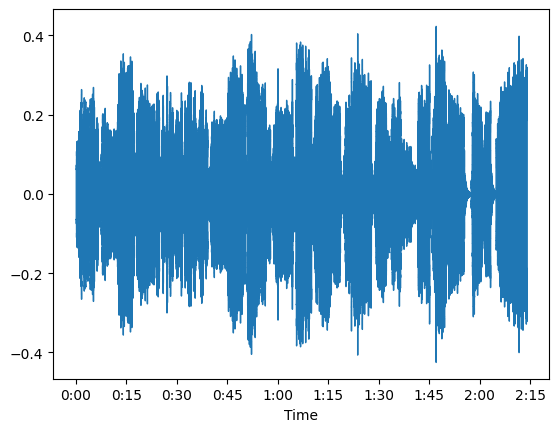

In [2]:
import librosa
import librosa.display
filename = 'André-Rieu-134sec.wav'
y, sr = librosa.load(filename)
# trim silent edges
whale_song, _ = librosa.effects.trim(y)
# librosa.display.waveplot(whale_song, sr=sr);
# Replace waveplot with waveshow
librosa.display.waveshow(whale_song, sr=sr);

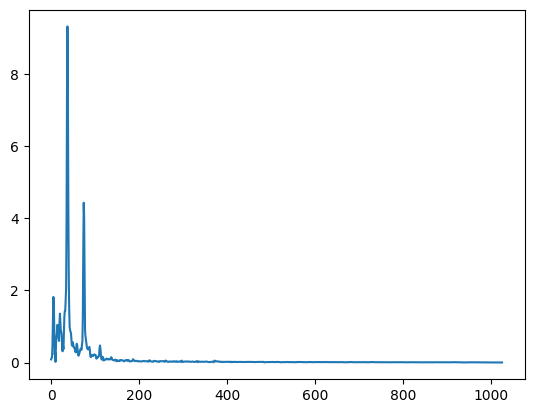

In [3]:
import numpy as np
from matplotlib import pyplot as plt

n_fft = 2048
D = np.abs(librosa.stft(whale_song[:n_fft], n_fft=n_fft,
                        hop_length=n_fft+1))
plt.plot(D);

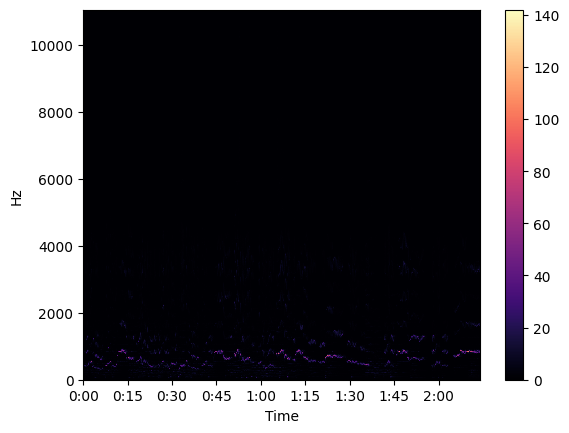

In [4]:
import matplotlib.pyplot as plt
hop_length = 512
D = np.abs(librosa.stft(whale_song, n_fft=n_fft,
                        hop_length=hop_length))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='linear');
plt.colorbar();

### Now this is what we call a Spectrogram!

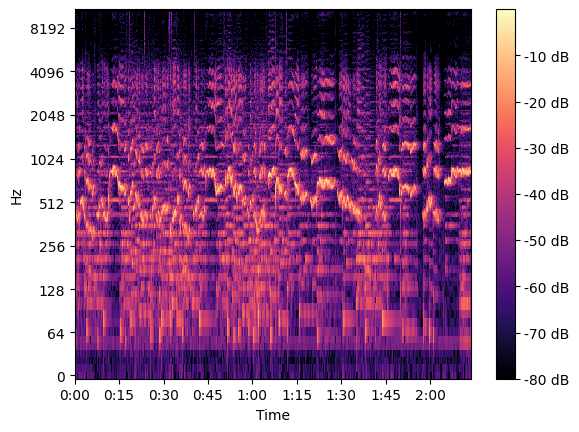

In [5]:
DB = librosa.amplitude_to_db(D, ref=np.max)
librosa.display.specshow(DB, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');

### The Mel Scale

### The Mel Scale, mathematically speaking, is the result of some non-linear transformation of the frequency scale. This Mel Scale is constructed such that sounds of equal distance from each other on the Mel Scale, also “sound” to humans as they are equal in distance from one another.
### In contrast to  Hz scale, where the difference between 500 and 1000 Hz is obvious, whereas the difference between 7500 and 8000 Hz is barely noticeable.

In [6]:
### Luckily, someone computed this non-linear transformation for us, and all we need to do to apply it is use the appropriate command from librosa.

In [7]:
n_mels = 128
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)

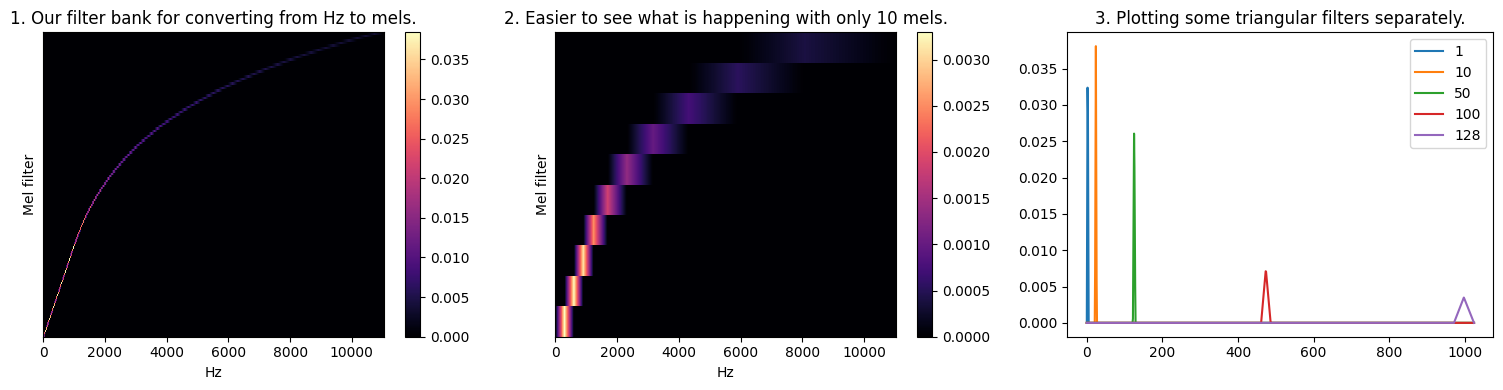

In [8]:
plt.figure(figsize=(15, 4));
plt.subplot(1, 3, 1);
librosa.display.specshow(mel, sr=sr, hop_length=hop_length,
                         x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('1. Our filter bank for converting from Hz to mels.');
plt.subplot(1, 3, 2);
mel_10 = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=10)
librosa.display.specshow(mel_10, sr=sr, hop_length=hop_length,
                         x_axis='linear');
plt.ylabel('Mel filter');
plt.colorbar();
plt.title('2. Easier to see what is happening with only 10 mels.');
plt.subplot(1, 3, 3);
idxs_to_plot = [0, 9, 49, 99, 127]
for i in idxs_to_plot:
    plt.plot(mel[i]);
plt.legend(labels=['{}'.format(i+1) for i in idxs_to_plot]);
plt.title('3. Plotting some triangular filters separately.');
plt.tight_layout();

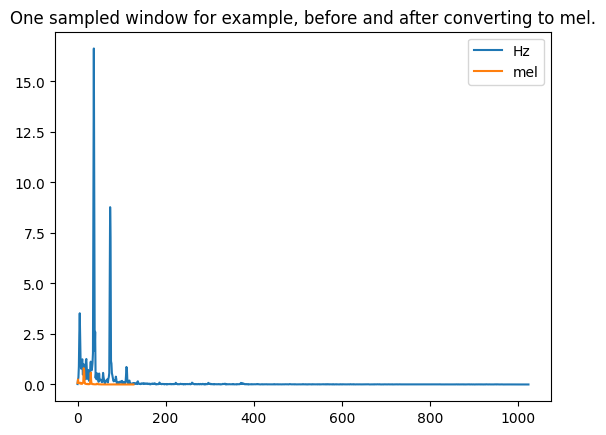

In [9]:
plt.plot(D[:, 1]);
plt.plot(mel.dot(D[:, 1]));
plt.legend(labels=['Hz', 'mel']);
plt.title('One sampled window for example, before and after converting to mel.');

### The Mel Spectrogram

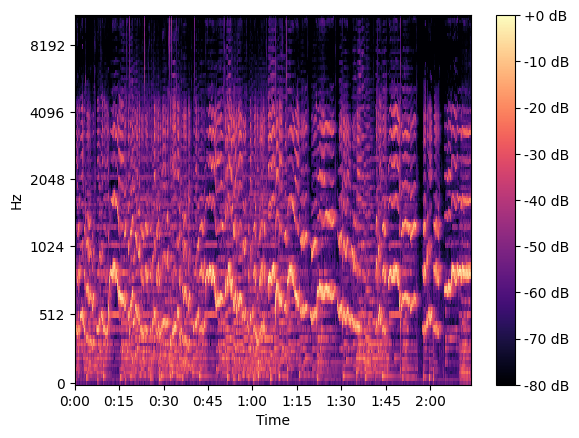

In [10]:
S = librosa.feature.melspectrogram(y=whale_song, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   n_mels=n_mels)
# The change is in this line^:  We are now passing 'whale_song' using the 'y' keyword
#                             This is how the librosa.feature.melspectrogram expects its input.
S_DB = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length,
                         x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');

### Recap
The Mel Spectrogram is the result of the following pipeline:
Separate to windows: Sample the input with windows of size n_fft=2048, making hops of size hop_length=512 each time to sample the next window.
Compute FFT (Fast Fourier Transform) for each window to transform from time domain to frequency domain.
Generate a Mel scale: Take the entire frequency spectrum, and separate it into n_mels=128 evenly spaced frequencies.
And what do we mean by evenly spaced? not by distance on the frequency dimension, but distance as it is heard by the human ear.
Generate Spectrogram: For each window, decompose the magnitude of the signal into its components, corresponding to the frequencies in the mel scale.

# Sanity check that indeed we understood the underlying pipeline
S = librosa.feature.melspectrogram(whale_song, sr=sr, n_fft=n_fft,
                                   hop_length=hop_length,
                                   n_mels=n_mels)
fft_windows = librosa.stft(whale_song, n_fft=n_fft,
                           hop_length=hop_length)
magnitude = np.abs(fft_windows)**2
mel = librosa.filters.mel(sr=sr, n_fft=n_fft, n_mels=n_mels)
assert (mel.dot(magnitude) == S).all()